In [48]:
import os
from pathlib import Path
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr

In [49]:
parent = os.path.join(Path(os.getcwd()).parent)

print(parent)

sys.path.append(parent)

c:\Users\bruij_kn\OneDrive - Stichting Deltares\Documents\GitHub\thermo-morphological-model\test


In [50]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [51]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [52]:
folder_path = Path("c:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/sa_base")

In [53]:
output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000840', '0000

In [54]:
comp_times = []
timestep_ids = []
timestamps = []

i = 1

for output_id in output_ids:
    
    fname = str(output_id + '.nc')
    
    ds = xr.load_dataset(os.path.join(folder_path, fname))
    
    comp_time = ds.cumulative_computational_time.values
    timestep_id = ds.timestep_id.values
    timestamp = ds.timestamp.values
    
    ds.close()
    
    comp_times.append(comp_time)
    timestep_ids.append(timestep_id)
    timestamps.append(timestamp)
    
    print(f'finished {i}/{len(output_ids)}')
    
    i += 1
    
comp_times = np.array(comp_times)
timestep_ids = np.array(timestep_ids)
timestamps = np.array(timestamps)
    
np.savetxt('sa_base_computation-times.txt', comp_times)
np.savetxt('sa_base_timestep-ids.txt', timestep_ids)
np.savetxt('sa_base_timestamps.txt', timestamps)


finished 1/1460
finished 2/1460
finished 3/1460
finished 4/1460
finished 5/1460
finished 6/1460
finished 7/1460
finished 8/1460
finished 9/1460
finished 10/1460
finished 11/1460
finished 12/1460
finished 13/1460
finished 14/1460
finished 15/1460
finished 16/1460
finished 17/1460
finished 18/1460
finished 19/1460
finished 20/1460
finished 21/1460
finished 22/1460
finished 23/1460
finished 24/1460
finished 25/1460
finished 26/1460
finished 27/1460
finished 28/1460
finished 29/1460
finished 30/1460
finished 31/1460
finished 32/1460
finished 33/1460
finished 34/1460
finished 35/1460
finished 36/1460
finished 37/1460
finished 38/1460
finished 39/1460
finished 40/1460
finished 41/1460
finished 42/1460
finished 43/1460
finished 44/1460
finished 45/1460
finished 46/1460
finished 47/1460
finished 48/1460
finished 49/1460
finished 50/1460
finished 51/1460
finished 52/1460
finished 53/1460
finished 54/1460
finished 55/1460
finished 56/1460
finished 57/1460
finished 58/1460
finished 59/1460
finish

In [55]:
xbeach_times = np.loadtxt(os.path.join(folder_path, Path("xbeach_times.txt")))[::12]

In [56]:
gradient = np.gradient(comp_times, np.float32(timestamps))

avg_gradient = np.mean(gradient)

xbeach_activation_gradient = (gradient > avg_gradient)

date_pairs = []

for i in range(len(xbeach_activation_gradient)):
    
    if xbeach_activation_gradient[i] == 1 and xbeach_activation_gradient[i-1] == 0:
        date1 = timestamps[i]
        
        for j in range(len(xbeach_activation_gradient[i:])):
            if xbeach_activation_gradient[i:][j+1] == 0:
                
                date2 = timestamps[i:][j]
                
                date_pairs.append((date1, date2))
                
                break
            
    
print(date_pairs)

[(np.datetime64('2017-05-28T00:00:00.000000000'), np.datetime64('2017-05-28T12:00:00.000000000')), (np.datetime64('2017-06-04T00:00:00.000000000'), np.datetime64('2017-06-04T12:00:00.000000000')), (np.datetime64('2017-06-18T00:00:00.000000000'), np.datetime64('2017-06-18T12:00:00.000000000')), (np.datetime64('2017-06-24T12:00:00.000000000'), np.datetime64('2017-06-26T12:00:00.000000000')), (np.datetime64('2017-07-02T00:00:00.000000000'), np.datetime64('2017-07-02T12:00:00.000000000')), (np.datetime64('2017-07-09T00:00:00.000000000'), np.datetime64('2017-07-09T12:00:00.000000000')), (np.datetime64('2017-07-16T00:00:00.000000000'), np.datetime64('2017-07-16T12:00:00.000000000')), (np.datetime64('2017-07-21T00:00:00.000000000'), np.datetime64('2017-07-26T00:00:00.000000000')), (np.datetime64('2017-07-30T00:00:00.000000000'), np.datetime64('2017-07-30T12:00:00.000000000')), (np.datetime64('2017-08-02T12:00:00.000000000'), np.datetime64('2017-08-03T00:00:00.000000000')), (np.datetime64('201

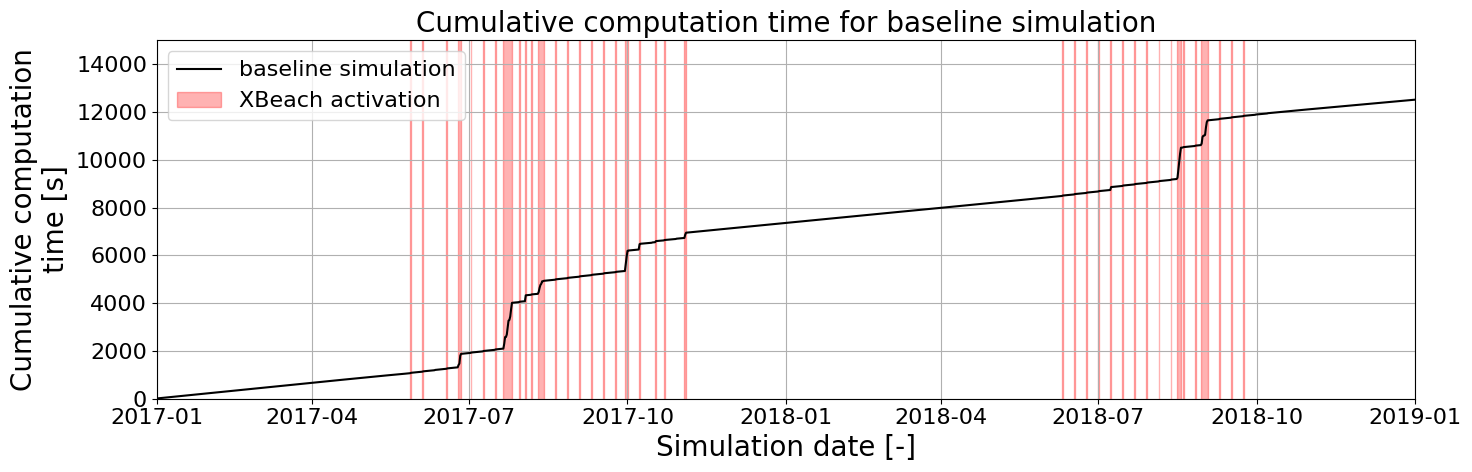

In [57]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(timestamps, comp_times, color='k', label='baseline simulation')

nonzero_mask = np.nonzero(xbeach_times)

# for i in xbeach_activation_gradient:
#     if date2 - date1 <= pd.to_timedelta("24h"):
#         ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='r')

for date1, date2 in date_pairs:
    ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='r')

    
        
ax.fill_between([0, 0], 0, 0, alpha=0.3, label='XBeach activation', color='r')

ax.set_xlabel('Simulation date [-]')
ax.set_ylabel('Cumulative computation\ntime [s]')

ax.set_title("Cumulative computation time for baseline simulation")

ax.set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2019-01-01")))
ax.set_ylim((0, 15000))

ax.grid()

ax.legend()

fig.tight_layout()

figname = 'computational_time_sa_base.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)